<a href="https://colab.research.google.com/github/Peckkie/DPDM2021/blob/main/DPDM_miniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เชื่อมต่อไดร์ฟ

In [ ]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir( '/content/drive/MyDrive/DPDM_ME/my_project/data2') # local path
!ls

covid_19_data.csv		     time_series_covid_19_confirmed_US.csv
kaggle.json			     time_series_covid_19_deaths.csv
novel-corona-virus-2019-dataset.zip  time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv   time_series_covid_19_recovered.csv


#Install packet 

In [ ]:
!pip install pmdarima

# เปิดไฟล์ข้อมูล

In [ ]:
import numpy as np 
import pandas as pd # data processing, CSV file  (e.g. pd.read_csv)

In [ ]:
covid = pd.read_csv('covid_19_data.csv')
print('row count : ', covid.shape[0])
print('column count : ', covid.shape[1])

row count :  306429
column count :  8


In [ ]:
covid.columns #แสดง column ทั้งหมด

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.000000,2335.000000,95289.000000
306425,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.000000,245.000000,0.000000
306426,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.000000,1.000000,1324.000000
306427,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.000000,1738.000000,83790.000000


#เช็คค่า missing

In [ ]:
print("ขนาดของข้อมูล: ",covid.shape)

ขนาดของข้อมูล:  (306429, 8)


In [ ]:
print("เช็ค null values:\n",covid.isnull().sum())

เช็ค null values:
 SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [ ]:
print("เช็ค Data-type เเต่ละคอลัมน์:\n",covid.dtypes)

เช็ค Data-type เเต่ละคอลัมน์:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [ ]:
#ลบคอลัมน์ที่ไม่ใช้
covid.drop(["SNo"],1,inplace=True)

In [ ]:
print("เช็ค null values:\n",covid.isnull().sum())

เช็ค null values:
 ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [ ]:
#แปลงคอลัมน์ "Observation Date" เป็น Datetime 
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [ ]:
# ลบค่า missing ของคอลัมน์ Province/State ออกเนื่อจากข้อมูลส่วนนี้มีส่วนสำคัญที่จะนำไปวิเคราะห์ต่อหากเติมค่า missing ด้วย mode อาจทำให้ข้อมูลมีความคลาดเคลื่อนได้
covid = covid.dropna()

In [ ]:
print("เช็ค null values:\n",covid.isnull().sum())

เช็ค null values:
 ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


# 1 ศึกษาการระบาดของ COVID-19 ด้วยการทำ Visualizations และการจัดกลุ่มข้อมูลวิธี Clustering

## Visualizations

### การวิเคราะห์ตามวันที่ 

In [ ]:
#groupby ObservationDate เเละเเสดงผลรวมรายวัน
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()
datewise

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-01-22,550.0,28.0,17.0,0 days
2020-01-23,1088.0,58.0,34.0,1 days
2020-01-24,925.0,36.0,26.0,2 days
2020-01-25,1411.0,39.0,42.0,3 days
2020-01-26,2085.0,49.0,56.0,4 days
...,...,...,...,...
2021-05-25,115693206.0,63714612.0,2470982.0,489 days
2021-05-26,116092305.0,64130135.0,2480596.0,490 days
2021-05-27,116466022.0,64673366.0,2490458.0,491 days


In [ ]:
import plotly.express as px

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

#Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#การเพิ่มจำนวน Active Cases จะบ่งบอกได้ว่าจำนวนของ Recovered case หรือ Death case ลดลงมากเมื่อเทียบกับจำนวน Confirmed Cases

#### Growth rate of Confirmed, Recovered and Death Cases

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### การวิเคราะห์อัตราการตายและอัตราการฟื้นตัวทั่วโลก 

In [ ]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
from plotly.subplots import make_subplots

In [ ]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

#Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#Recovery rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
#สรุปผล
#Mortality rate  เเสดงให้เห็นว่าใช้เวลานานพอสมควรกว่าจะมีเเนวโน้มของจำนวนคนตายที่ลดลง
#Recovery rate เเสดงให้เห็นว่าช่วงเดือนพฤษภาคม - มิถุนายน บ่งบอกได้ถึงความรุนเเรงของเชื้อว่าอาจเกิอการกลายพันธ์ของเชื้อโควิดได้ทำให้มีจำนวนผู้เสียที่สูงมาก

Average Mortality Rate 3.3250930183157084
Median Mortality Rate 2.778916464467656
Average Recovery Rate 48.047314175359794
Median Recovery Rate 48.61547492577658


### การวิเคราะห์ตาม Country

In [ ]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [ ]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



In [ ]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Deaths"])

In [ ]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])

Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

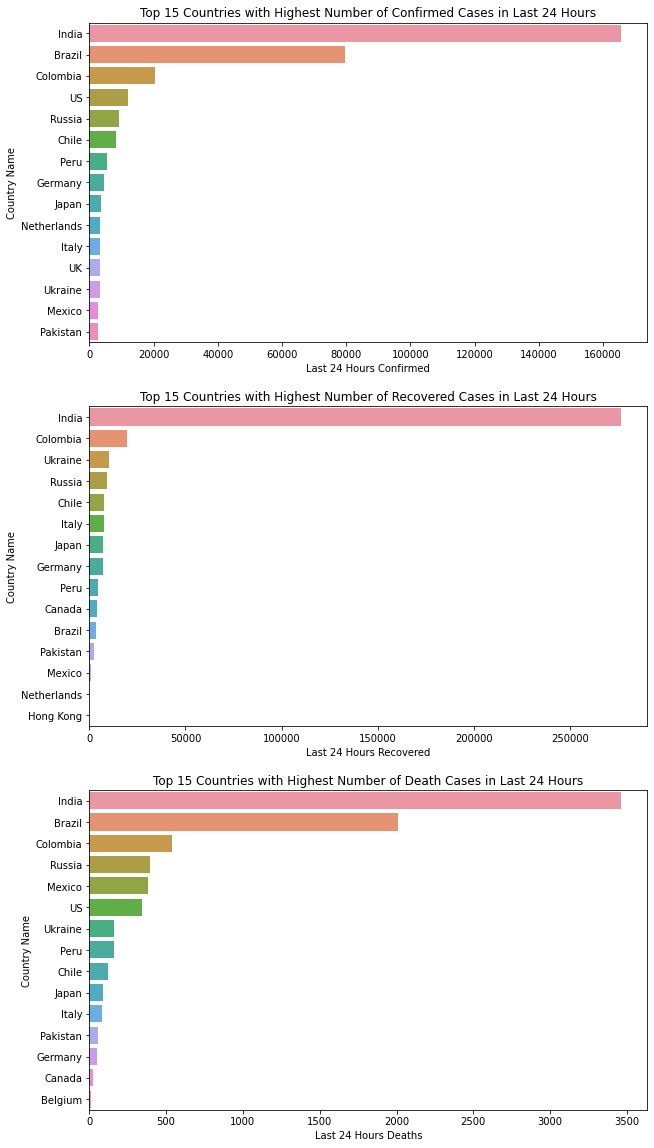

In [ ]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
sns.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

#### Proportion of Countries in Confirmed, Recovered and Death Cases

In [ ]:
Last_24_Hours_country["Proportion of Confirmed"]=(Last_24_Hours_country["Last 24 Hours Confirmed"]/(datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Recovered"]=(Last_24_Hours_country["Last 24 Hours Recovered"]/(datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Deaths"]=(Last_24_Hours_country["Last 24 Hours Deaths"]/(datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2]))*100

In [ ]:
Last_24_Hours_country[["Country Name","Proportion of Confirmed","Proportion of Recovered","Proportion of Deaths"]].sort_values(["Proportion of Confirmed"],ascending=False).style.background_gradient(cmap="Reds")

,Country Name,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths
1,India,49.922351,76.568311,43.731041
2,Brazil,24.024413,0.976263,25.429727
8,Colombia,6.179946,5.448283,6.825076
0,US,3.611352,0.000000,4.335187
3,Russia,2.760682,2.534459,4.992417
14,Chile,2.477527,2.132370,1.504044
11,Peru,1.658821,1.310182,2.047523
6,Germany,1.360891,1.953634,0.669869
18,Japan,1.086783,1.997972,1.150152
12,Netherlands,1.021045,0.008313,0.101112


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

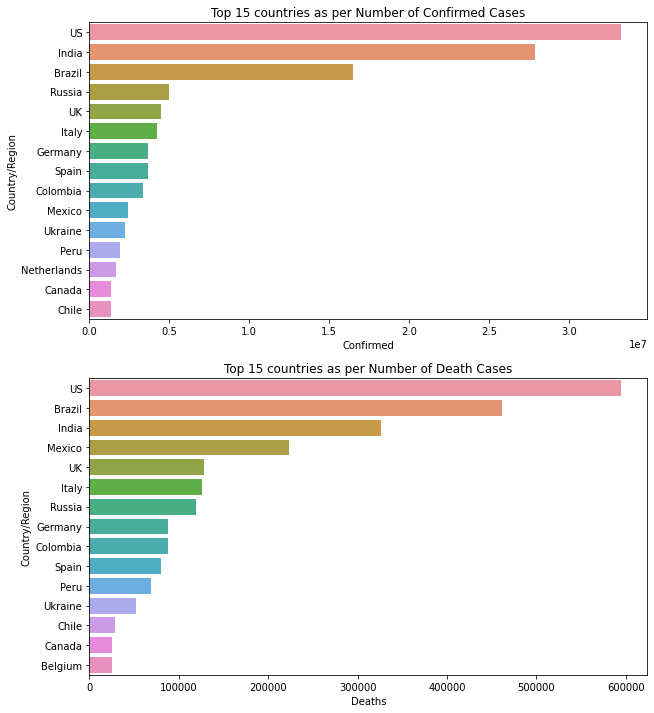

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

#### 25 อันดับสูงสุดประเทศตามอัตราการเสียชีวิตและอัตราการฟื้นตัวที่มี Confirmed Cases มากกว่า 500 ราย 

Text(0.5, 0, 'Recovery (in Percentage)')

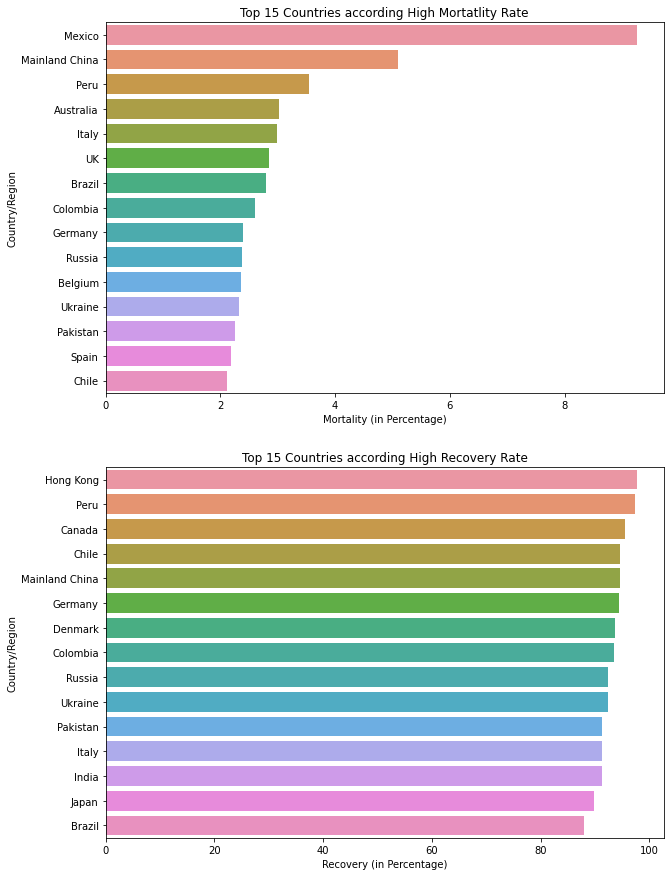

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

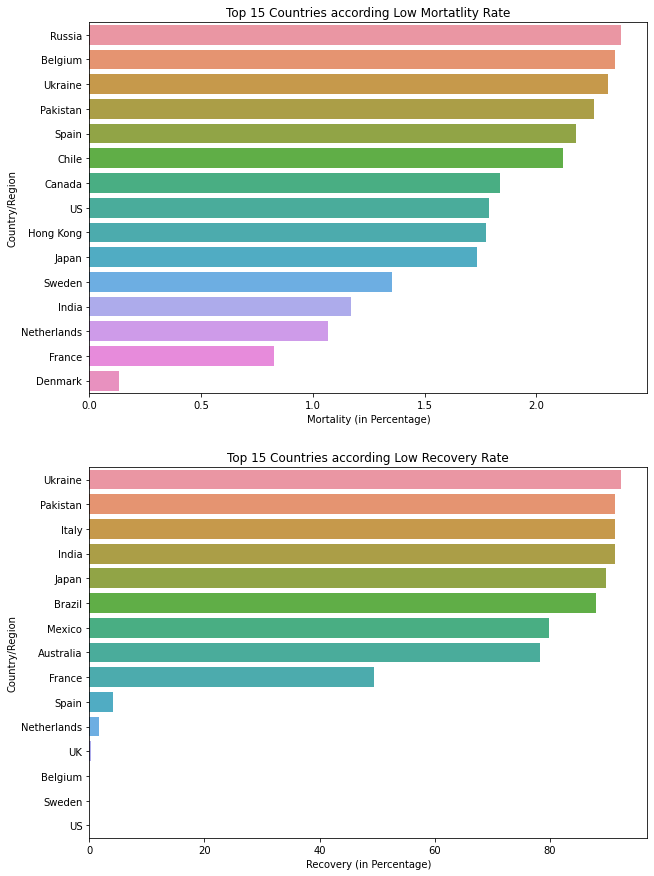

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

In [ ]:
# grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
# grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
# grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
# grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

In [ ]:
# #Calculating countrywise Moratality and Recovery Rate
# countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
# countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
# countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

## การจัดกลุ่มข้อมูลวิธี Clustering

จัดกลุ่มประเทศโดยพิจารณา Mortality rate กับ Recovery rate
เนื่องจากทราบว่า COVID-19 มีอัตราการเสียชีวิตที่แตกต่างกันในแต่ละประเทศโดยพิจารณาจากปัจจัยต่างๆ และอัตราการฟื้นตัวก็เช่นกัน เนื่องจากแนวทางปฏิบัติในการควบคุมการระบาดใหญ่ของแต่ละประเทศ นอกจากนี้ อัตราการเสียชีวิตและอัตราการฟื้นตัวจะพิจารณาจาก Confirmed Recoverd และ Deaths cases

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X=countrywise[["Mortality","Recovery"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
wcss=[]
sil=[]
# fine-tune n_clusters ตั้งแต่ 2 ถึง 10
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Elbow Method')

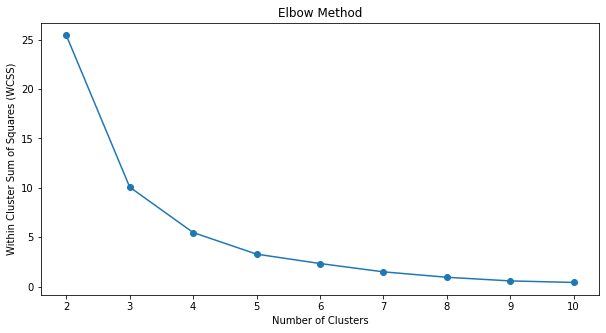

In [ ]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

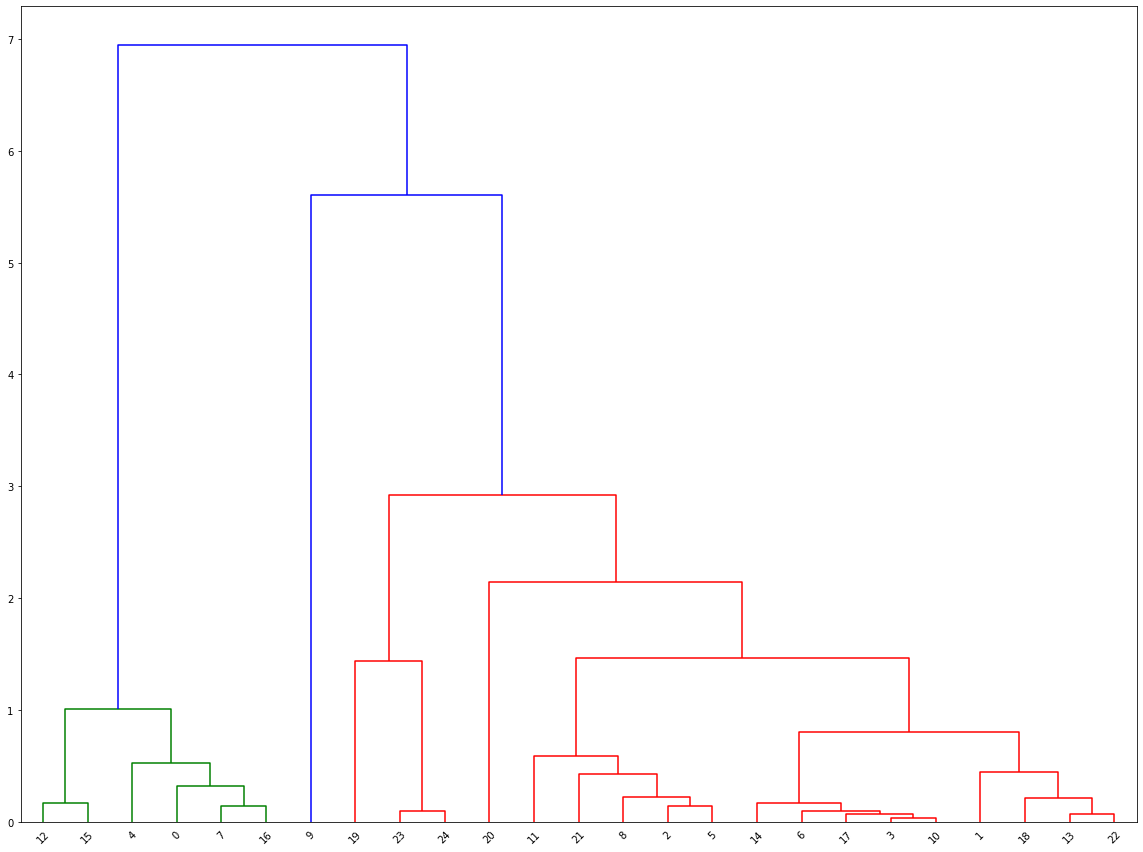

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [ ]:
#ทั้ง 2 วิธีการ Elbow Method และ Hierarchical Clustering แสดงให้เห็นว่า K=3 จะแก้ไขจำนวนคลัสเตอร์ 

In [ ]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [ ]:
countrywise["Clusters"]=clf_final.predict(X)

In [ ]:
# Summary of Clusters  เเสดงเเค่ Top - 15
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Clusters
Country/Region,,,,,,
US,33251939.00,0.00,594306.00,1.79,0.00,1.00
UK,4496823.00,15481.00,128037.00,2.85,0.34,1.00
Spain,3668658.00,150376.00,79905.00,2.18,4.10,1.00
Netherlands,1671967.00,26810.00,17889.00,1.07,1.60,1.00
Sweden,1068473.00,0.00,14451.00,1.35,0.00,1.00
Belgium,1059763.00,0.00,24921.00,2.35,0.00,1.00
France,119524.00,59192.00,986.00,0.82,49.52,1.00
Mexico,2411503.00,1924865.00,223455.00,9.27,79.82,2.00
India,27894800.00,25454320.00,325972.00,1.17,91.25,0.00


In [ ]:
print("Avergae Mortality Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())

Avergae Mortality Rate of Cluster 0:  2.2458608299070626
Avergae Recovery Rate of Cluster 0:  92.48578099862402
Avergae Mortality Rate of Cluster 1:  1.7730763129734348
Avergae Recovery Rate of Cluster 1:  7.9385445273457425
Avergae Mortality Rate of Cluster 2:  9.266212814166103
Avergae Recovery Rate of Cluster 2:  79.82013706804429


In [ ]:
import seaborn as sns

In [ ]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

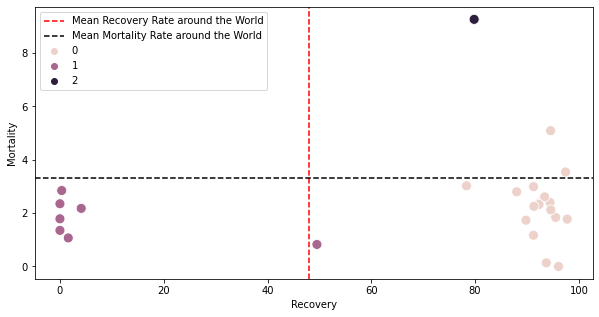

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Recovery"],y=countrywise["Mortality"],hue=countrywise["Clusters"],s=100)
plt.axvline(((datewise["Recovered"]/datewise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((datewise["Deaths"]/datewise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend()

In [ ]:
#เเสดงประเทศในเเต่ละกลุ่ม
print("Few Countries belonging to Cluster 0: ",list(countrywise[countrywise["Clusters"]==0].head(10).index))
print("Few Countries belonging to Cluster 1: ",list(countrywise[countrywise["Clusters"]==1].head(10).index))
print("Few Countries belonging to Cluster 2: ",list(countrywise[countrywise["Clusters"]==2].head(10).index))

Few Countries belonging to Cluster 0:  ['India', 'Brazil', 'Russia', 'Italy', 'Germany', 'Colombia', 'Ukraine', 'Peru', 'Canada', 'Chile']
Few Countries belonging to Cluster 1:  ['US', 'UK', 'Spain', 'Netherlands', 'Sweden', 'Belgium', 'France']
Few Countries belonging to Cluster 2:  ['Mexico']



Cluster 0 คือกลุ่มประเทศที่มีอัตราการเสียชีวิตต่ำและอัตราการฟื้นตัวสูงจริงๆ เหล่านี้เป็นชุดของประเทศที่สามารถควบคุม COVID-19 ได้โดยปฏิบัติตามแนวทางการควบคุมการระบาดใหญ่อย่างเข้มงวด

Cluster 1คือกลุ่มประเทศที่มีอัตราการเสียชีวิตต่ำและอัตราการฟื้นตัวที่ต่ำมาก ประเทศเหล่านี้จำเป็นต้องเร่งอัตราการหมุนเวียนเพื่อเอาตัวรอด บางประเทศมีผู้ติดเชื้อจำนวนมาก แต่อัตราการเสียชีวิตต่ำถือเป็นสัญญาณที่ดี 

Cluster 2 :คือกลุ่มประเทศที่มีอัตราการเสียชีวิตสูงมากและมีอัตราการฟื้นตัวที่ดีพอสมควร โดยพื้นฐานแล้ว มีเพียงไม่กี่ประเทศในกลุ่มเหล่านี้ที่ได้เห็นการระบาดครั้งใหญ่ที่เลวร้ายที่สุดแล้ว แต่ตอนนี้กำลังฟื้นตัวด้วยอัตราการฟื้นตัวอย่างปกติ

# 2 คาดการณ์และพยากรณ์อนุกรมเวลาเพื่อศึกษาผลกระทบและการแพร่กระจายของ COVID-19 ในอนาคต

##2.1 Linear Regression Model for Confirm Cases Prediction

In [ ]:
# Linear Regression Model for Confirm Cases Prediction

In [ ]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [ ]:
train_ml.head()

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-01-22,550.0,28.0,17.0,0
2020-01-23,1088.0,58.0,34.0,1
2020-01-24,925.0,36.0,26.0,2
2020-01-25,1411.0,39.0,42.0,3
2020-01-26,2085.0,49.0,56.0,4


In [ ]:
train_Days_Since =  np.array(train_ml["Days Since"]).reshape(-1,1)
train_Confirmed =  np.array(train_ml["Confirmed"]).reshape(-1,1)
valid_Days_Since = np.array(valid_ml["Days Since"]).reshape(-1,1)
valid_Confirmed =  np.array(valid_ml["Confirmed"]).reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
lin_reg=LinearRegression(normalize=True)

In [ ]:
lin_reg.fit(train_Days_Since, train_Confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_valid_linreg=lin_reg.predict(valid_Days_Since)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_Confirmed ,prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  21821102.971842162


In [ ]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# ตัวแบบการถดถอยเชิงเส้นกำลังแตกสลายโดยสิ้นเชิง
# ดังจะเห็นได้ชัดเจนว่าแนวโน้มของคดีที่ได้รับการยืนยันในรูปแบบไม่เชิงเส้นอย่างแน่นอน

<Figure size 792x432 with 0 Axes>

##2.2 Polynomial Regression for Prediction of Confirmed Cases 

In [ ]:
# Polynomial Regression for Prediction of Confirmed Cases

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
poly = PolynomialFeatures(degree = 8) 

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  21907204.79256391


In [ ]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

## 2.3 Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [ ]:
# Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [ ]:
from sklearn.svm import SVR

In [ ]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [ ]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  22659287.705777597


In [ ]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#การสนับสนุนโมเดล Vector Machine ไม่ได้ให้ผลลัพธ์ที่ยอดเยี่ยมในขณะนี้ การคาดคะเนอาจเกินหรือต่ำกว่าที่คาดไว้จริงๆ 

<Figure size 792x432 with 0 Axes>

In [ ]:
from datetime import timedelta

In [ ]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606


In [ ]:
#การทำนายการถดถอยเชิงเส้นไม่มีที่ไหนเลยที่ใกล้เคียงกับค่าจริง 

### Time Series Forecasting

## 2.4 Holt's Linear Model

In [ ]:
# Holt's Linear Model

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing

In [ ]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



In [ ]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  1255327.091849066


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027,120575319.728897
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961,121162250.386695
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388,121749181.044494
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169,122336111.702292
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606,122923042.360091


## 2.5 Holt's Winter Model for Daily Time Series

In [ ]:
# Holt's Winter Model for Daily Time Series

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  1663219.6283597576


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027,120575319.728897,121249405.097439
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961,121162250.386695,121745071.161057
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388,121749181.044494,122306625.862185
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169,122336111.702292,122984811.527863
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606,122923042.360091,123683670.165190


In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

## 2.6 AR Model (using AUTO ARIMA)

In [ ]:
# AR Model (using AUTO ARIMA)

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=11894.899, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=11839.533, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=11825.804, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=11791.565, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=11769.768, Time=0.13 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0] intercept
Total fit time: 0.306 seconds


ARIMA(maxiter=50, method='lbfgs', order=(4, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  1426640.4658037585


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027,120575319.728897,121249405.097439,120984957.950421
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961,121162250.386695,121745071.161057,121605607.412261
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388,121749181.044494,122306625.862185,122227517.707618
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169,122336111.702292,122984811.527863,122850678.796821
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606,122923042.360091,123683670.165190,123475097.607897


## 2.7 MA Model (using AUTO ARIMA)

In [ ]:
# MA Model (using AUTO ARIMA)

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=2,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=11894.899, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=11756.572, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=11750.680, Time=0.10 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 0.184 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))

Root Mean Square Error for MA Model:  2034858.9576709177


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027,120575319.728897,121249405.097439,120984957.950421,122298705.382853
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961,121162250.386695,121745071.161057,121605607.412261,123006733.916906
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388,121749181.044494,122306625.862185,122227517.707618,123718707.364168
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169,122336111.702292,122984811.527863,122850678.796821,124434625.724640
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606,122923042.360091,123683670.165190,123475097.607897,125154488.998322


## 2.8 ARIMA Model (using AUTOARIMA)

In [ ]:
# ARIMA Model (using AUTOARIMA)

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=11894.899, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=11756.572, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=11750.680, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=11779.710, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=11839.533, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=11747.140, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=11750.686, Time=0.18 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=11738.612, Time=0.34 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=11825.804, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=11744.432, Time=0.20 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=11746.450, Time=0.41 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=11734.745, Time=0.46 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=11791.565, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=11723.406, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=11732.680, Time=0.51

ARIMA(maxiter=50, method='lbfgs', order=(3, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  1754240.9110097955


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027,120575319.728897,121249405.097439,120984957.950421,122298705.382853,121642585.703780
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961,121162250.386695,121745071.161057,121605607.412261,123006733.916906,122298533.854639
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388,121749181.044494,122306625.862185,122227517.707618,123718707.364168,122956523.327517
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169,122336111.702292,122984811.527863,122850678.796821,124434625.724640,123616554.989647
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606,122923042.360091,123683670.165190,123475097.607897,125154488.998322,124278628.828203


## 2.9  SARIMA Model (using AUTO ARIMA)

In [ ]:
# SARIMA Model (using AUTO ARIMA)

In [ ]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=11893.023, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=11831.091, Time=0.11 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=11743.081, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=11756.075, Time=0.04 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=11687.511, Time=0.39 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=11736.534, Time=0.13 sec
 ARIMA(0,2,1)(2,0,1)[7]             : AIC=11688.892, Time=0.61 sec
 ARIMA(0,2,1)(1,0,2)[7]             : AIC=11688.908, Time=0.82 sec
 ARIMA(0,2,1)(0,0,2)[7]             : AIC=11733.983, Time=0.36 sec
 ARIMA(0,2,1)(2,0,0)[7]             : AIC=11719.725, Time=0.25 sec
 ARIMA(0,2,1)(2,0,2)[7]             : AIC=inf, Time=1.59 sec
 ARIMA(1,2,1)(1,0,1)[7]             : AIC=11686.830, Time=0.53 sec
 ARIMA(1,2,1)(0,0,1)[7]             : AIC=11736.244, Time=0.22 sec
 ARIMA(1,2,1)(1,0,0)[7]        

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  1938937.6325938497


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027,120575319.728897,121249405.097439,120984957.950421,122298705.382853,121642585.703780,122001452.426240
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961,121162250.386695,121745071.161057,121605607.412261,123006733.916906,122298533.854639,122629185.861337
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388,121749181.044494,122306625.862185,122227517.707618,123718707.364168,122956523.327517,123312712.663119
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169,122336111.702292,122984811.527863,122850678.796821,124434625.724640,123616554.989647,124024292.089244
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606,122923042.360091,123683670.165190,123475097.607897,125154488.998322,124278628.828203,124748098.092109


## 2.10 Facebook's Prophet Model for forecasting

In [ ]:
# Facebook's Prophet Model for forecasting

In [ ]:
from fbprophet import Prophet

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [ ]:
prophet_confirmed

,ds,y
0,2020-01-22,550.000000
1,2020-01-23,1088.000000
2,2020-01-24,925.000000
3,2020-01-25,1411.000000
4,2020-01-26,2085.000000
...,...,...
489,2021-05-25,115693206.000000
490,2021-05-26,116092305.000000
491,2021-05-27,116466022.000000
492,2021-05-28,116794539.000000


In [ ]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)
#print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  977193.3111567078


Figure(720x432)


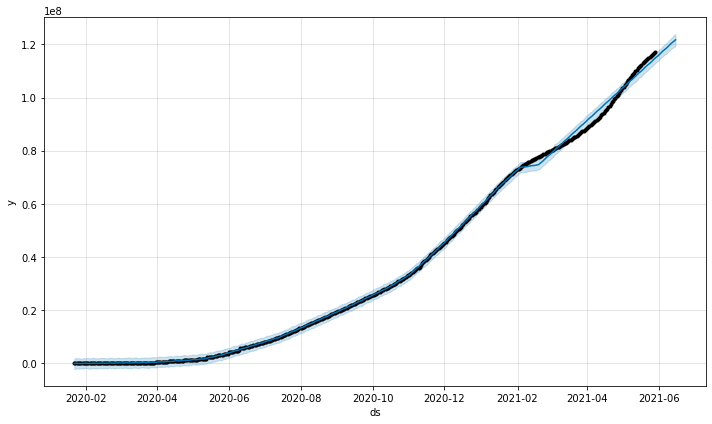

In [ ]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


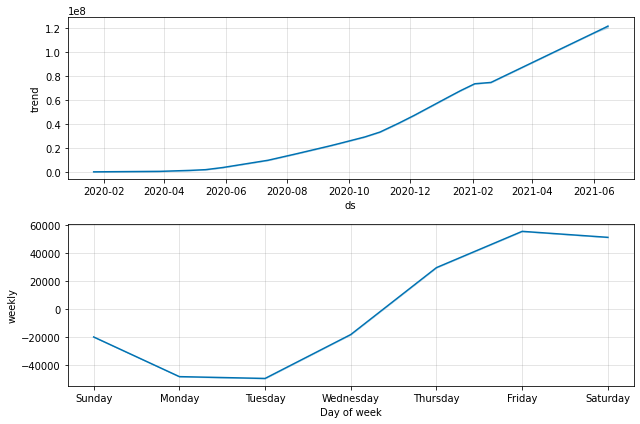

In [ ]:
print(prophet_c.plot_components(confirmed_forecast))

## Summarization of Forecasts using different Models

In [ ]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Holt's Linear","Holt's Winter Model",
            "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model","SARIMA Model","Facebook's Prophet Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
9,Facebook's Prophet Model,977193.311157
3,Holt's Linear,1255327.091849
5,Auto Regressive Model (AR),1426640.465804
4,Holt's Winter Model,1663219.628360
7,ARIMA Model,1754240.911010
8,SARIMA Model,1938937.632594
6,Moving Average Model (MA),2034858.957671
0,Linear Regression,21821102.971842
1,Polynomial Regression,21907204.792564
2,Support Vector Machine Regressor,22659287.705778


In [ ]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2021-05-30,93368434.310272,163246650.257463,153389872.816027,120575319.728897,121249405.097439,120984957.950421,122298705.382853,121642585.703780,122001452.426240,115290766.745429,117118439.167296
1,2021-05-31,93600332.093047,166754803.618140,155055390.534961,121162250.386695,121745071.161057,121605607.412261,123006733.916906,122298533.854639,122629185.861337,115668114.418615,117563807.289314
2,2021-06-01,93832229.875821,170398148.945860,156737816.901388,121749181.044494,122306625.862185,122227517.707618,123718707.364168,122956523.327517,123312712.663119,116072536.058313,118088933.238929
3,2021-06-02,94064127.658596,174180853.108196,158437288.965169,122336111.702292,122984811.527863,122850678.796821,124434625.724640,123616554.989647,124024292.089244,116509657.958774,118288142.746121
4,2021-06-03,94296025.441370,178107176.347906,160153944.607606,122923042.360091,123683670.165190,123475097.607897,125154488.998322,124278628.828203,124748098.092109,116963250.308424,118731467.353067


## Time Series Forecasting for Death Cases

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Death Cases"))
fig.update_layout(title="Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_deaths=pd.DataFrame(zip(list(datewise.index),list(datewise["Deaths"])),columns=['ds','y'])

In [ ]:
prophet_c.fit(prophet_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  50768346.67441268


Figure(720x432)


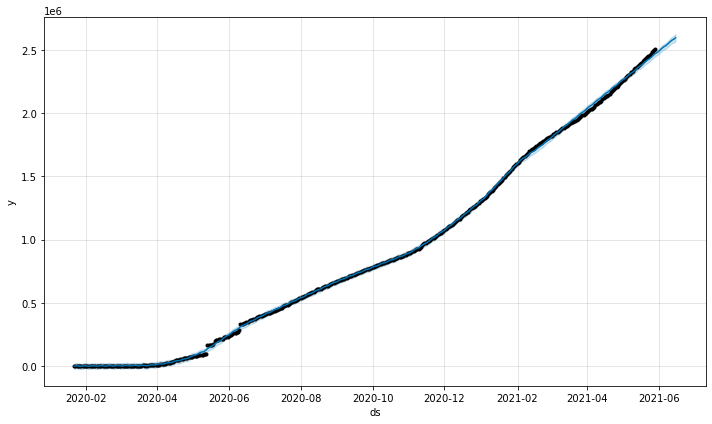

In [ ]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


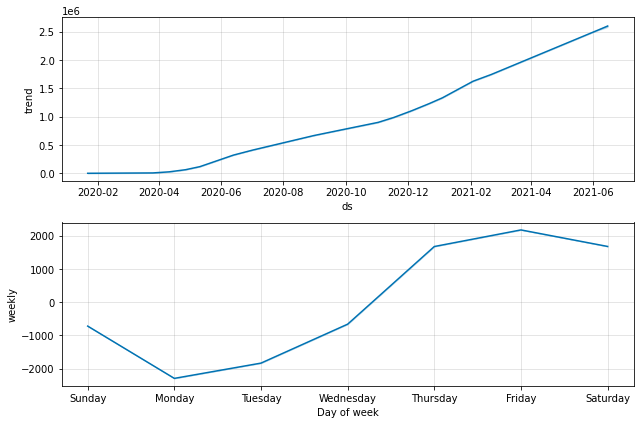

In [ ]:
print(prophet_c.plot_components(confirmed_forecast))

In [ ]:
#สรุปผล
ถึงเเม้ว่าอัตราการเสียชีวิตไม่สูงมาก  และอัตราการหาย(Recovery Rate ) ที่ดีต่อสุขภาพยังบ่งบอกว่าโรคนั้นสามารถรักษาให้หายขาดได้
สิ่งเดียวที่น่ากังวลคืออัตราการแนวโน้มแบบทวีคูณของการติดเชื้อที่มีเเนวโน้มที่เพิ่มขึ้นเรื่อยๆ